In [7]:
# import opencv
import cv2
import numpy as np
import matplotlib.pyplot as plt

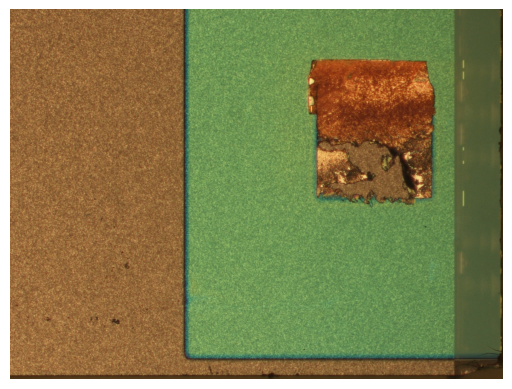

In [10]:
# Read an image
# input_image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
input_image = cv2.imread("../content/AllImage/1/AC84704828_S_0.210_Slave.jpg", cv2.IMREAD_UNCHANGED)

height = input_image.shape[0]
width = input_image.shape[1]

# Checking image is grayscale or not. If image shape is 2 then gray scale otherwise not
if len(input_image.shape) == 2:
    gray_input_image = input_image.copy()
else:
    # Converting BGR image to grayscale image
    gray_input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# To find upper threshold, we need to apply Otsu's thresholding
upper_threshold, thresh_input_image = cv2.threshold(
    gray_input_image, thresh=0, maxval=255, type=cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
# Calculate lower threshold
lower_threshold = 0.5 * upper_threshold

# Apply canny edge detection
canny = cv2.Canny(input_image, lower_threshold, upper_threshold)
# Finding the non-zero points of canny
pts = np.argwhere(canny > 0)

# Finding the min and max points
y1, x1 = pts.min(axis=0)
y2, x2 = pts.max(axis=0)

# Crop ROI from the givn image
output_image = input_image[y1:y2, x1:x2]

# Convert BGR to RGB for displaying with Matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the output image using Matplotlib
plt.imshow(output_image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()